# 06-1. 군집 알고리즘


## 타깃을 모르는 비지도 학습

* 논타깃 -> 비지도학습

## 과일 사진 데이터 준비하기


In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy # 코랩에서 !로 시작하면 리눅스처럼 반응한다.

--2021-09-24 10:30:33--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-09-24 10:30:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-09-24 10:30:34--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fruits = np.load("fruits_300.npy")

In [4]:
print(fruits.shape)

(300, 100, 100)


In [5]:
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


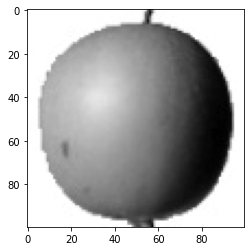

In [6]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

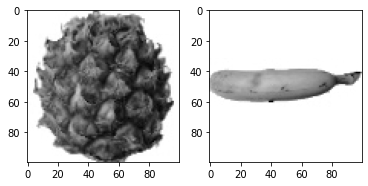

In [7]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')

In [8]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [9]:
print(apple.shape)

(100, 10000)


In [10]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


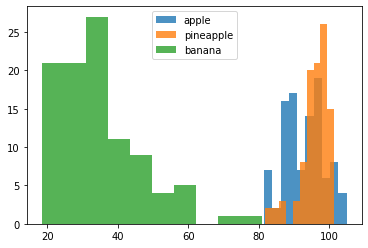

In [11]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(["apple","pineapple","banana"])
plt.show()

* 샘플 100개에 대한 픽셀의 평균값으로 차트를 두었을때,
* 바나나는 상관 없는데 사과랑 파인애플이 너무 겹친다.
* 픽셀별 평균값을 구하자.

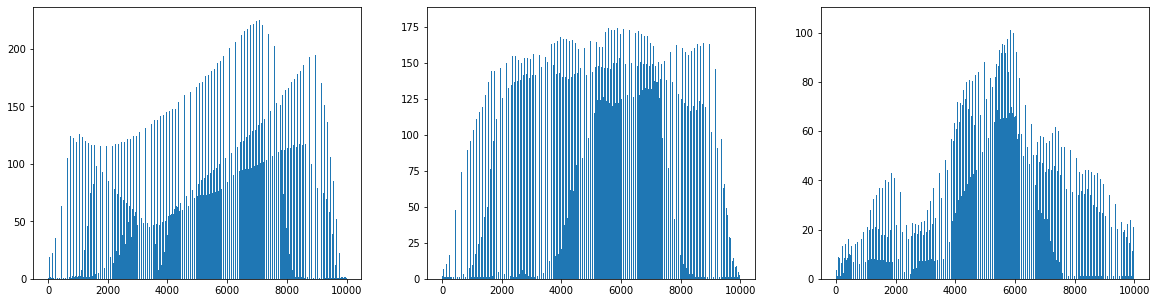

In [12]:
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple,axis=0))
axs[1].bar(range(10000), np.mean(pineapple,axis=0))
axs[2].bar(range(10000), np.mean(banana,axis=0))

plt.show()

* 사과는 사진 아래로 내려갈수록 값이 높고,
* 파인애플은 전체적으로 고르고 높다.
* 바나나 같은 경우 중앙의 픽셀 값이 높다.

모든 이미지를 합쳐놓은 대표 이미지라고 생각하면 된다.

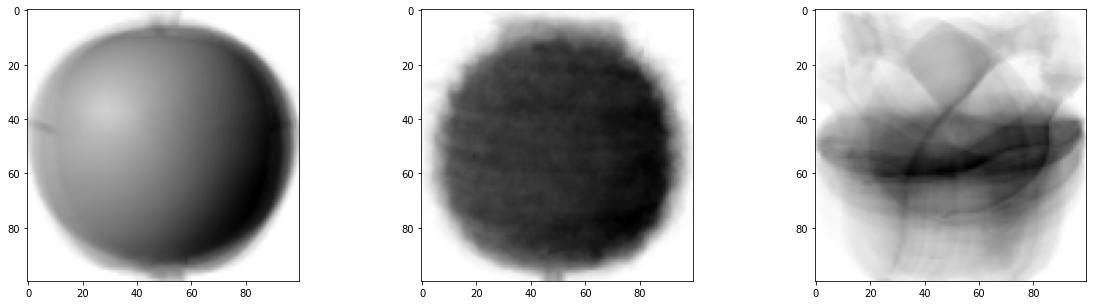

In [13]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기
* 모든 샘플에서 apple_mean값을 뺀 절댓값 평균을 계산한다.

In [14]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


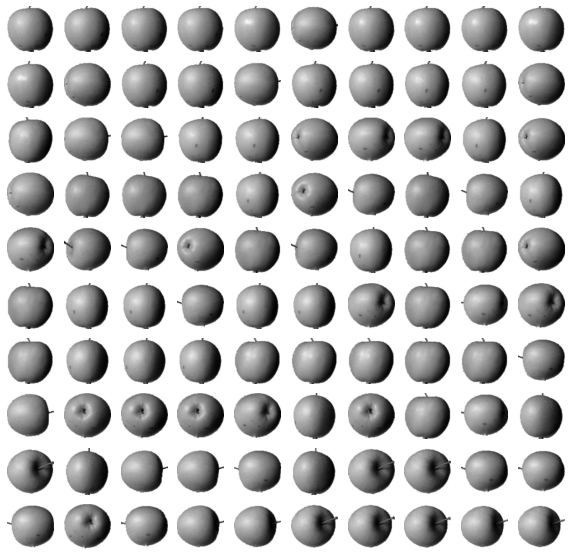

In [15]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
    axs[i, j].axis('off')
plt.show()

## 비슷한 샘플끼리 모으기
* 비지도 학습의 대표적인 학습 문제 - 군집
  * 샘플을 알고 있었기에, 유추가 가능했었다.
* 실제 비지도는 타깃이 없다. 

# 06-2. k-평균

* k-평균 군집 알고리즘
  * 클러스터 중심 또는 센트로이드라고 부른다.
  * cluster center, centroid



## KMean 클라스

In [16]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2021-09-24 10:31:29--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-09-24 10:31:29--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-09-24 10:31:29--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [17]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

In [18]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [19]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


* 레이블값 0,1,2의 순서는 의미 없다. 이미지를 출력하는 것이 최선이다.

In [20]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [21]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 개수
  # 한 줄의 10개의 이미지
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 계수입니다. 그렇지 않으면 10개.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')

  plt.show()


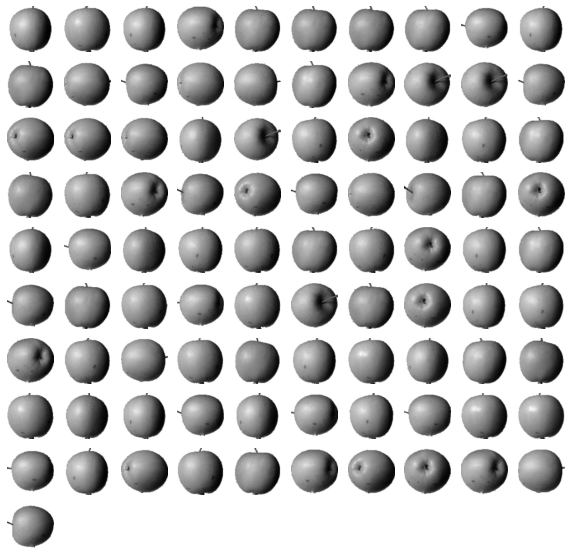

In [22]:
draw_fruits(fruits[km.labels_==0])

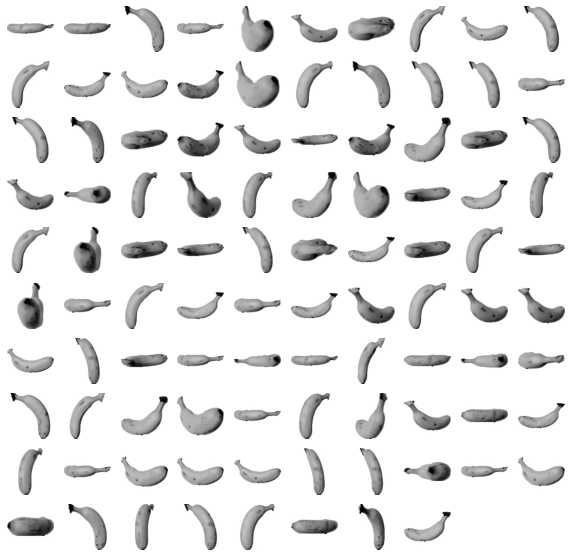

In [23]:
draw_fruits(fruits[km.labels_==1])

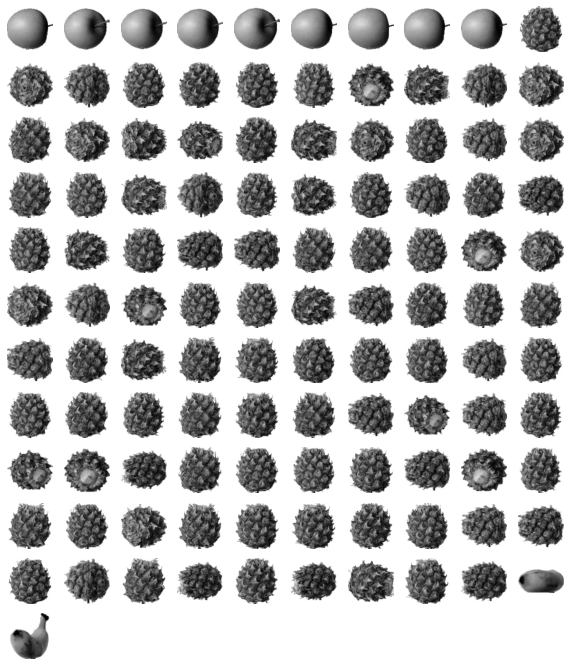

In [24]:
draw_fruits(fruits[km.labels_==2])

* 비록 레이블 2에서 사과 9개와 바나나 2개가 섞여있지만, 훈련데이터에서 타깃 레이블을 전혀 제공하지 않았음에도 비교적 잘 구분한 셈이다.

## 클러스터 중심
* KMeans 클라스 의 클러스터 중심은 cluster_centers_ 속성에 저장되어있다.
* fruits_2d 샘플을 다시 100 X 100 의 크기로 바꾸어줘야한다.

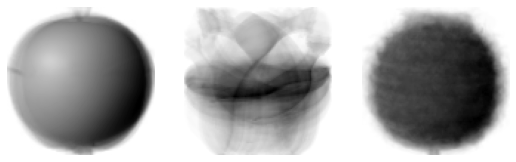

In [25]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [26]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [27]:
print(km.predict(fruits_2d[100:101]))

[2]


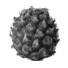

In [28]:
draw_fruits(fruits[100:101])

In [29]:
print(km.n_iter_)

3


## 최적의 k 찾기
* k-평균 알고리즘 단점 중 하나는 클러스터의 개수를 사전에 지정해야 한다는 점.
* 적절한 k 값을 구하기 위해 완벽한 방법은 없으나, 가장 대표적인 방법: 엘보우 elbow 방법을 사용한다.
* 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 이너셔 inertia라고 부른다.
* 클러스터의 개수가 늘어나면, 클러스터 개개의 크기가 줄어들어서 이너셔가 줄어든다.
* 클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있어서, 이 때 클러스터를 늘려도 밀집된 정도가 개선되지 않는다. 이 모양이 팔꿈치 모양으로 보여 엘보우 방법이라고 부른다.


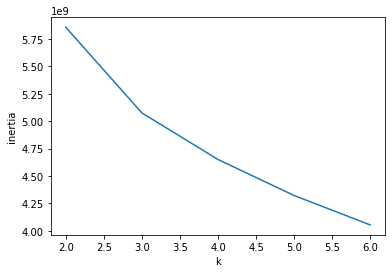

In [30]:
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

거의 변하지 않지만 3에서 미세하게 변하는 것을 알수가 있다.

## 과일 자동으로 분류하기
* 타깃을 정하지 않고 K-평균 알고리즘을 사용하기에 클러스터간 거리를 하나의 특성으로 잡아서 구현했다.
* transform과 predict 메서드로 가까운 클러스터를 예측값으로 출력한다.
* 이너셔를 사용해 클러스터 k 값을 구한다.

# 06-3. 주성분 분석
* 너무 많은 사진들의 등록되어 저장 공간 부족
* 사진 용량 줄이기
* 차원 축소하기

## 차원과 차원 축소
* 벡터의 "차원"이 아니고, 특성을 머신러닝에선 차원이라고 부른다.
* 근데 dimension 이라고 부른 것도 함정.
* dimension reduction 알고리즘
  * 주성분 분석 - PCA (princpal component analysis)
  

## 주성분 분석 소개
* 주성분 분석은 데이터에 있는 분상이 큰 방향을 찾는 것이라고 이해할수 있다.
* 주성분은 벡터이며 원본 데이터에 있는 어떤 방향이다.

## PCA 클라스 

In [31]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

--2021-09-24 10:31:45--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-09-24 10:31:45--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-09-24 10:31:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
print(pca.components_.shape)

(50, 10000)


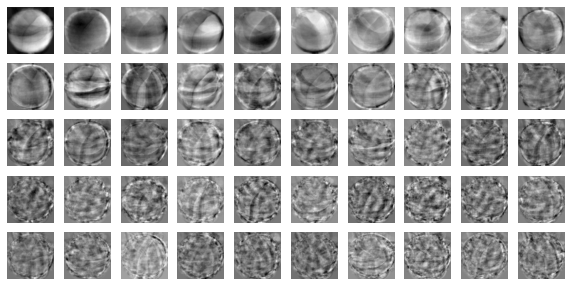

In [34]:
draw_fruits(pca.components_.reshape(-10, 100, 100))

In [35]:
print(fruits_2d.shape)

(300, 10000)


In [36]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성
* 10,000개의 특성을 50개로 줄임
  * 손실발생
* 재구성 가능


In [37]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


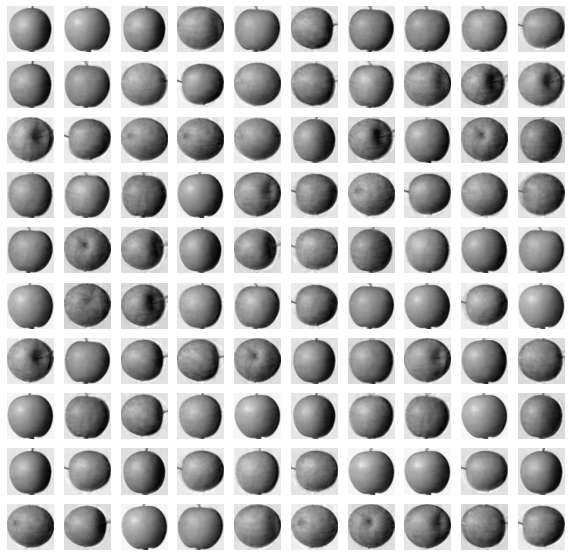

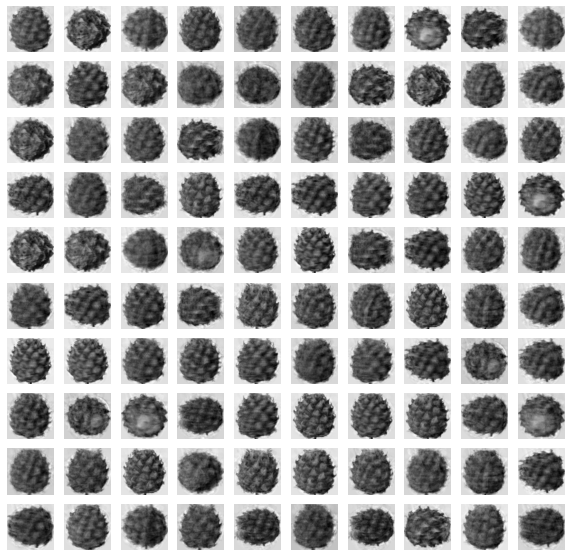

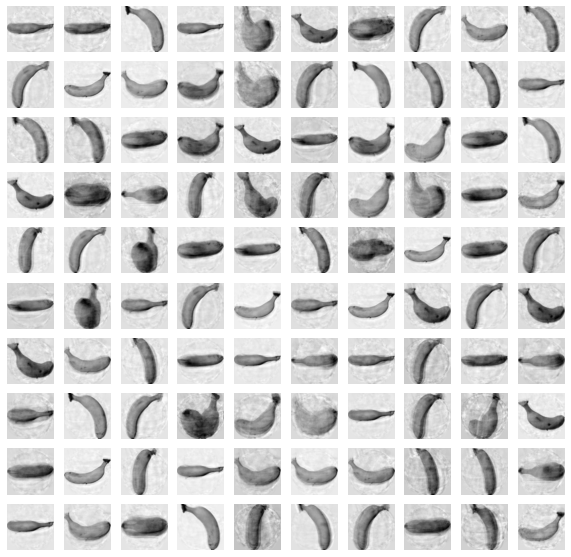

In [38]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

## 설명된 분산 - explained variance
* PCA 클라스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율로 기록되어 있다.

In [39]:
print(np.sum(pca.explained_variance_ratio_))

0.9214539915745643


* 92%의 분산을 유지하고 있다.

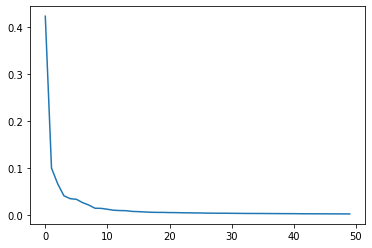

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

* 처음 10개의 주성분이 대부분의 분산을 표현하고 있다. 따라 각 주성분이 설명하고 있는 분산은 비교적 작다.

## 다른 알고리즘과 함계 사용하기
* LR이랑 사용하기

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [42]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [43]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score'])) # 훈련 점수
print(np.mean(scores['fit_time'])) # 훈련시간 

0.9966666666666667
0.8765761375427246


In [44]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.029609823226928712


정확도도 올라가고 시간도 0.022로 줄었다.

In [45]:
pca = PCA(n_components=0.5) # 분산의 50%에 해당되는 주성분 찾기

In [46]:
pca.fit(fruits_2d)
pca.n_components_

2

단 2개의 특성으로 원본 데이터의 분산의 50% 표현가능하다.

In [47]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [48]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.035398340225219725


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


* 교차 검증의 결과가 매우 좋다.

In [49]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  99, 110]))


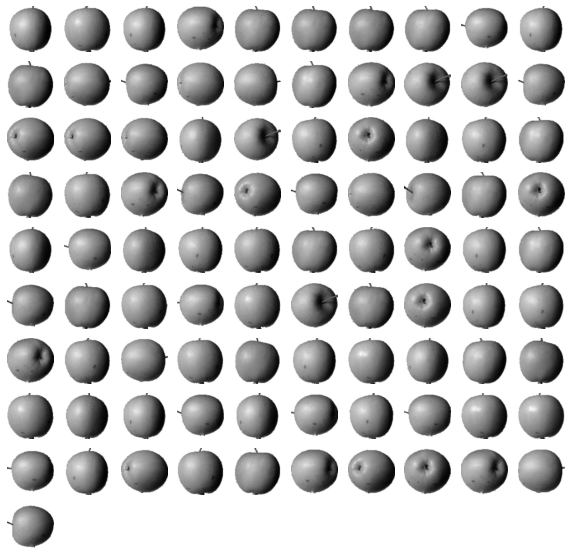

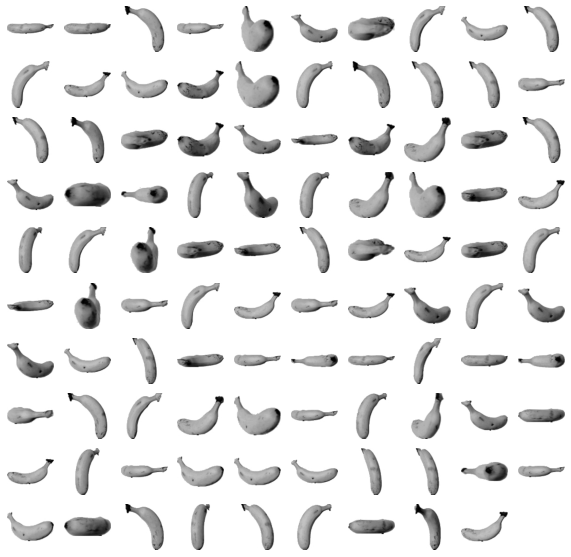

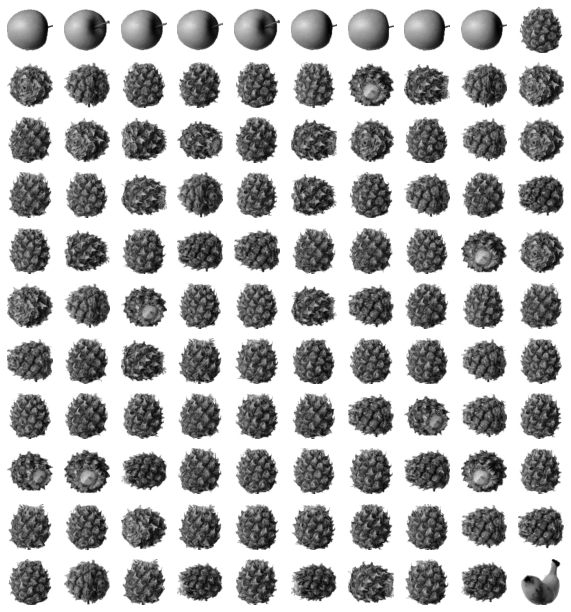

In [50]:
for label in range(3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

* 유사하게 생긴 사과 몇개와 바나나 1개가 들어가 있다.
* 차원을 줄여서 얻을 수 있는 건 "시각화"이다.
* 산점도 그리기

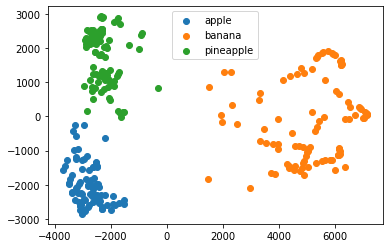

In [51]:
for label in range(3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:, 1])
plt.legend(["apple","banana","pineapple",])
plt.show()